## Question 1

In [1]:
import string
alphabet = string.ascii_lowercase
word_1 = alphabet[2::3]
word_2 = alphabet[-5::2]

print("The first word is",word_1, "and the second word is", word_2)

The first word is cfilorux and the second word is vxz


## Question 2

In [2]:
import numpy as np
np.set_printoptions(3)

print("Pi is approximately equal to {:.9}".format(np.pi))

Pi is approximately equal to 3.14159265


## Question 3

In [3]:
s = "HelLo WorLd!!"
occurences = {}
for char in s :
    occurences[char] = occurences.get(char, 0) + 1

print('The number of occurences of each character in the string s is :\n', occurences)

The number of occurences of each character in the string s is :
 {'H': 1, 'e': 1, 'l': 1, 'L': 2, 'o': 2, ' ': 1, 'W': 1, 'r': 1, 'd': 1, '!': 2}


## Question 4

In [4]:
def cesar_code(string):
    result = ""
    for char in string.lower(): # Considers the string in its lower case version
        if char in alphabet :
            result += alphabet[(alphabet.index(char) + 3) % 26]
        else : # If the character is not a letter, no change is necessary
            result += char
    return result

In [5]:
print("The cesar code converts 'Intro to Python' to '{}'".format(cesar_code('Intro to Python')))

The cesar code converts 'Intro to Python' to 'lqwur wr sbwkrq'


## Question 5

In [6]:
from datetime import datetime

n = 10_000_000

def product_loop(n): # Computation using a for loop
    product = 1
    for i in range(1, n+1):
        num = 4 * (i**2)
        product *= num / (num-1)
    return 2 * product

def product_np(n): # Computation using numpy
    num = 4 * (np.arange(1, n)**2)
    return 2 * np.prod(num / (num-1))

def print_result(f): # Prints the result and the computation time
    start = datetime.now()
    print("   The product is approximately {}".format(f(n)))
    end = datetime.now()
    print("   The computation time is :", end - start)

print("Using a loop :")
print_result(product_loop)

print("Using numpy :")
print_result(product_np)

print("The fastest version is the one using numpy, we also notice that the result is an approximation of pi")

Using a loop :
   The product is approximately 3.1415925750808533
   The computation time is : 0:00:03.811993
Using numpy :
   The product is approximately 3.1415925750808458
   The computation time is : 0:00:00.160618
The fastest version is the one using numpy, we also notice that the result is an approximation of pi


## Question 6

In [7]:
M = np.random.uniform(-1, 1, (5, 6)) # Generates the random matrix with coefficients taken uniformly in [-1,1]
M[:,::2] -= 2 * M[:,1::2] # Substracts to each even column of M twice the value of the following column
M[M < 0] = 0 # Replaces the negative values by 0

print("The result matrix is :\n", M)

The result matrix is :
 [[1.765 0.    0.518 0.    0.    0.194]
 [0.    0.618 0.    0.665 2.663 0.   ]
 [1.346 0.    0.387 0.    0.    0.224]
 [0.    0.    0.731 0.    0.861 0.   ]
 [0.527 0.    0.    0.577 0.    0.12 ]]


## Question 7

In [8]:
M = np.random.uniform(-1, 1, (5, 20))
G = M @ M.T
        
def test(G):
    if (G.all() == G.T.all() and np.all(np.linalg.eigvals(G) > 0)):
        print('The matrix is symmetric definite positive.')
    elif(G.all() == G.T.all() and np.all(np.linalg.eigvals(G) >= 0)) :
        print('The matrix is symmetric semi-definite positive.')
    else:
        print('The matrix is not symmetric (semi-)definite positive.')

test(G)
print('The rank of G is', np.linalg.matrix_rank(G))
print('The euclidien norm of G is', np.linalg.norm(G))
print('The L1 norms of the columns of G are\n', np.linalg.norm(G, axis = 0, ord = 1))

The matrix is symmetric definite positive.
The rank of G is 5
The euclidien norm of G is 18.59045641185613
The L1 norms of the columns of G are
 [15.972 16.388  8.358 18.094 10.422]


## Question 8

In [9]:
# Using list comprehension :
squares_comprehension = [i**2 for i in range(1,12)] 
# Using numpy :
squares_np = list(np.arange(1,12)**2)

print('With list comprehension :', squares_comprehension)
print('With numpy :', squares_np)

With list comprehension : [1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121]
With numpy : [1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121]


## Question 9

In [10]:
from os import path
import pandas as pd
import urllib
import zipfile
import sys

url = u'https://archive.ics.uci.edu/ml/machine-learning-databases/00235/'
filename = 'household_power_consumption'
zipfilename = filename + '.zip'
Location = url + zipfilename

if not(path.isfile(zipfilename)):
    urllib.request.urlretrieve(Location, zipfilename)
    
zip = zipfile.ZipFile(zipfilename)
zip.extractall()
na_values = ['?', '']
fields = ['Date', 'Time', 'Global_active_power']
df = pd.read_csv(filename + '.txt', sep=';', nrows=200000, na_values=na_values, usecols=fields)

## Question 10

In [11]:
# To detect missing values, we use :
df.isna()

Date   Time  Global_active_power
0       False  False                False
1       False  False                False
2       False  False                False
3       False  False                False
4       False  False                False
...       ...    ...                  ...
199995  False  False                False
199996  False  False                False
199997  False  False                False
199998  False  False                False
199999  False  False                False

[200000 rows x 3 columns]

In [12]:
#  To count the number of missing values, we use :
df.isna().sum()

Date                      0
Time                      0
Global_active_power    3732
dtype: int64

In [13]:
print('There are {} missing values'.format(df.Global_active_power.isna().sum()))

There are 3732 missing values


## Question 11

In [14]:
# To erase rows with missing values, we use :
df.dropna(inplace=True)

## Question 12

In [15]:
df.Date = pd.to_datetime(df.Date, format = '%d/%m/%Y')
df.set_index('Date', drop = True, inplace = True)
df.head()

Time  Global_active_power
Date                                     
2006-12-16  17:24:00                4.216
2006-12-16  17:25:00                5.360
2006-12-16  17:26:00                5.374
2006-12-16  17:27:00                5.388
2006-12-16  17:28:00                3.666

## Question 13

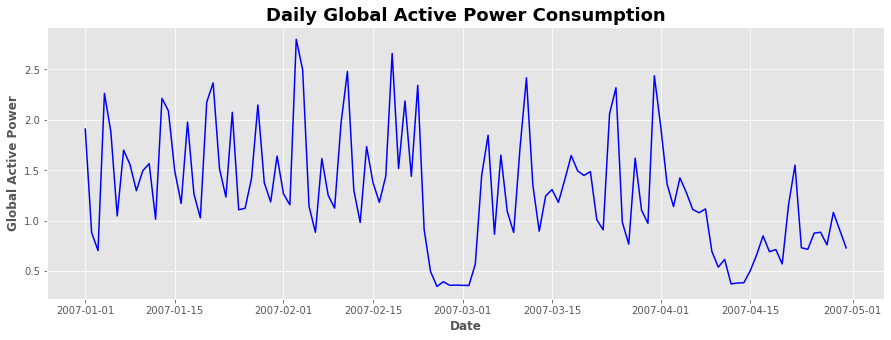

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

df2 = df.groupby(df.index).mean()['2007-01-01':'2007-04-30']

plt.figure(figsize=(15,5))
plt.plot(df2.index, df2.Global_active_power, color='blue')
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Global Active Power', fontsize=12, fontweight='bold')
plt.title('Daily Global Active Power Consumption', fontsize=18, fontweight='bold')
plt.show()

### We can see that the consumption level of global active power declines between February and early April. This could be explained by the fact that this period observed warmer temperatures, which could have led people to reduce their heating consumption.

## Question 14

In [17]:
# According to the txt doc, missing values are equal to -9999 in the TG column
df_temperatures = pd.read_csv('TG_STAID011249.txt', comment='#', na_values=-9999)
df_temperatures = df_temperatures[['    DATE', '   TG']]
df_temperatures.rename(columns={'    DATE':'Date', '   TG':'TG'}, inplace=True) # Renames the columns to remove unnecessary spaces
df_temperatures.TG /= 10
df_temperatures.dropna(inplace=True) # Drops rows with missing values
df_temperatures.head()

Date   TG
0  19210301  5.0
1  19210302  4.6
2  19210303  4.6
3  19210304  3.1
4  19210305  9.5

## Question 15

In [18]:
df_temperatures.Date = pd.to_datetime(df_temperatures.Date, format="%Y%m%d")
df_temperatures2 = df_temperatures.set_index('Date', drop=True)['2007-01-01':'2007-04-30']
df_temperatures2

TG
Date            
2007-01-01   9.6
2007-01-02   6.0
2007-01-03   6.1
2007-01-04   9.2
2007-01-05  10.0
...          ...
2007-04-26  19.2
2007-04-27  20.0
2007-04-28  20.0
2007-04-29  19.0
2007-04-30  16.9

[120 rows x 1 columns]

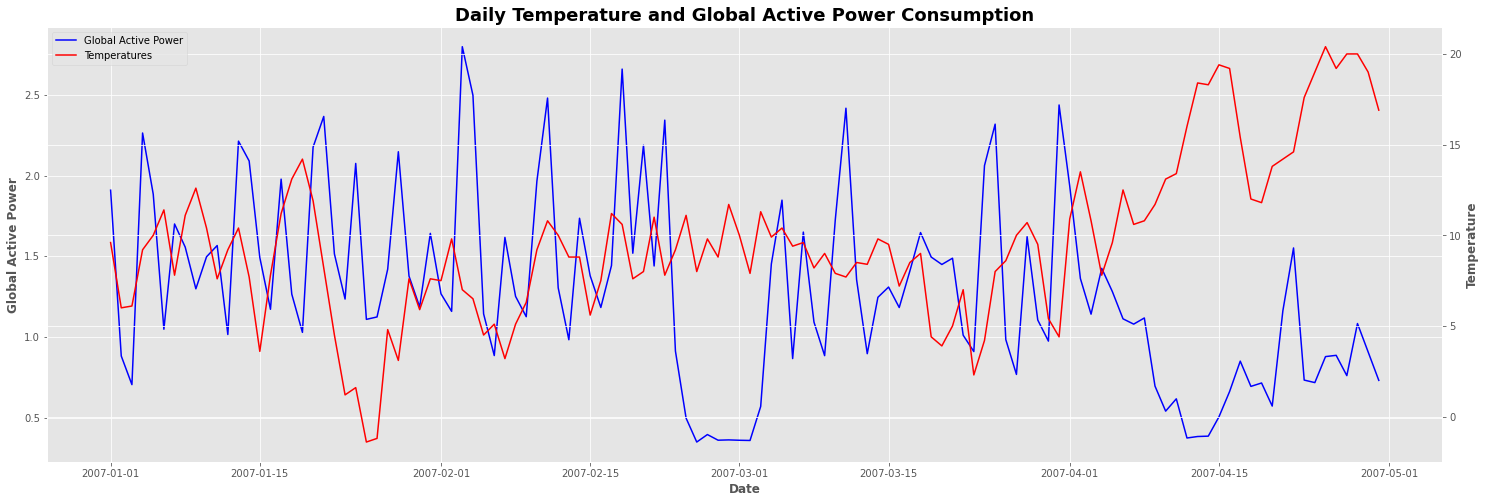

In [19]:
fig = plt.figure(figsize=(25,8))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

ax1.plot(df2.index, df2.Global_active_power, color='blue', label='Global Active Power')
ax2.plot(df_temperatures2.index, df_temperatures2.TG, color='red', label='Temperatures')

ax1.set_xlabel('Date', fontsize=12, fontweight='bold')
ax1.set_ylabel('Global Active Power', fontsize=12, fontweight='bold')
ax2.set_ylabel('Temperature', fontsize=12, fontweight='bold')

plt.title('Daily Temperature and Global Active Power Consumption', fontsize=18, fontweight='bold')
fig.legend(loc='upper left', bbox_to_anchor=(0,1), bbox_transform=ax1.transAxes)

plt.show()

### We notice that when the temperatures increase, there's a decrease in global active power consumption, especially in February and April, which may be explained by the fact that people stop using their heaters as the weather becomes milder.